# Clustering
More methods can be found here:http://scikit-learn.org/stable/modules/clustering.html

In [1]:
#coding=utf-8
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors
import numpy as np

Let's prepare some demo datasets.

In [2]:
from sklearn import cluster, datasets
np.random.seed(0)

In [3]:
low_noisy_moons = datasets.make_moons(n_samples=1000, noise=.05)

high_noisy_moons = datasets.make_moons(n_samples=1000, noise=.05)
for std in [0.5]:
    cur_moons = datasets.make_moons(n_samples=500, noise=std)
    high_noisy_moons = (np.vstack((high_noisy_moons[0], cur_moons[0])), np.hstack((high_noisy_moons[1], cur_moons[1])))
blobs = datasets.make_blobs(n_samples=1000, centers = 3, random_state=10)
blobs_different = datasets.make_blobs(n_samples=1000, centers = 3, cluster_std = [1., 2., 0.25], random_state=2)

demo_sets = [low_noisy_moons, high_noisy_moons, blobs, blobs_different]

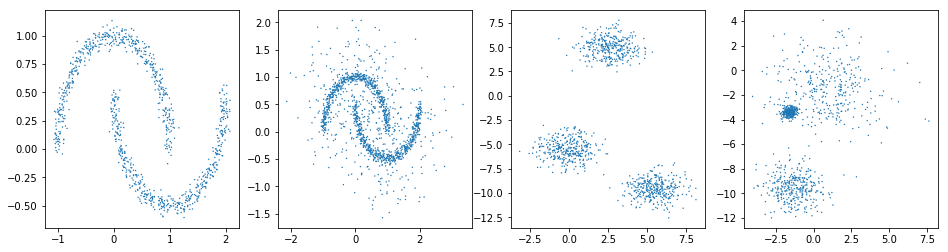

In [4]:
plt.figure(figsize = (16, 4))
for i in range(len(demo_sets)):
    plt.subplot(1, len(demo_sets), i + 1)
    plt.scatter(demo_sets[i][0][:, 0], demo_sets[i][0][:, 1], edgecolors='none', s = 2)

In [5]:
def plot_clustering(method):
    plt.figure(figsize = (16, 4))
    for i in range(len(demo_sets)):
        method.fit(demo_sets[i][0])
        plt.subplot(1, len(demo_sets), i + 1)
        predicted_clusters = method.predict(demo_sets[i][0])
        C = len(set(predicted_clusters))
        colors = [cm.Vega10(c) for c in predicted_clusters]
        plt.scatter(demo_sets[i][0][:, 0], demo_sets[i][0][:, 1], color = colors, edgecolors='none', s = 3)

## 1. K-means

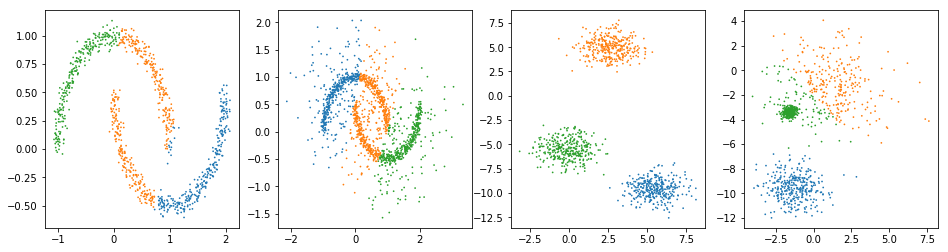

In [6]:
plot_clustering(cluster.KMeans(n_clusters = 3, random_state=3))

## 2. EM gaussian mixture disintegration

In [7]:
from sklearn.mixture import GaussianMixture

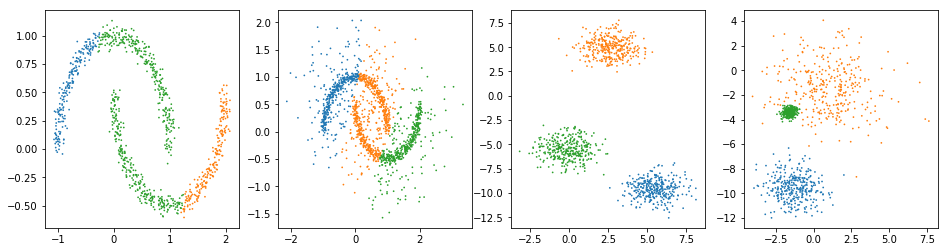

In [8]:
plot_clustering(GaussianMixture(n_components = 3, random_state=5))

## 3. Agglomerative

In [9]:
from sklearn.neighbors import kneighbors_graph

C:\Users\fms\Anaconda3\envs\py35\lib\site-packages\sklearn\cluster\hierarchical.py:418: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_components = _fix_connectivity(X, connectivity)


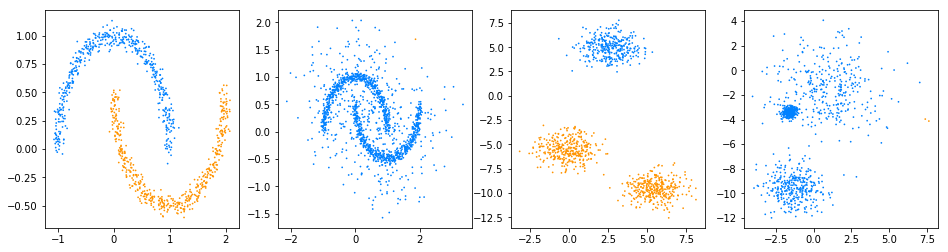

In [24]:
plt.figure(figsize = (16, 4))
for i in range(len(demo_sets)):
    plt.subplot(1, len(demo_sets), i + 1)
    
    # custom connectivity
    connectivity_matrix = kneighbors_graph(demo_sets[i][0], n_neighbors=10, include_self=False)
    connectivity_matrix = 0.5 * (connectivity_matrix + connectivity_matrix.T)
    
    method = cluster.AgglomerativeClustering(n_clusters=2, linkage='average', connectivity=connectivity_matrix)
    method.fit(demo_sets[i][0])
    predicted_clusters = method.labels_
    C = len(set(predicted_clusters))
    colors = [cm.jet((c+0.5)/C) for c in predicted_clusters]
    plt.scatter(demo_sets[i][0][:, 0], demo_sets[i][0][:, 1], color = colors, edgecolors='none', s = 3)

C:\Users\fms\Anaconda3\envs\py35\lib\site-packages\sklearn\cluster\hierarchical.py:418: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_components = _fix_connectivity(X, connectivity)


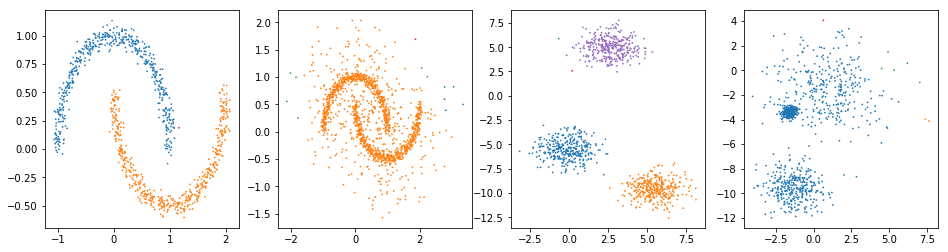

In [23]:
plt.figure(figsize = (16, 4))
for i in range(len(demo_sets)):
    plt.subplot(1, len(demo_sets), i + 1)
    
    # custom connectivity
    connectivity_matrix = kneighbors_graph(demo_sets[i][0], n_neighbors=10, include_self=False)
    connectivity_matrix = 0.5 * (connectivity_matrix + connectivity_matrix.T)
    
    method = cluster.AgglomerativeClustering(n_clusters=5, linkage='average', connectivity=connectivity_matrix)
    method.fit(demo_sets[i][0])
    predicted_clusters = method.labels_
    C = len(set(predicted_clusters))
    colors = [cm.Vega10(c) for c in predicted_clusters]
    plt.scatter(demo_sets[i][0][:, 0], demo_sets[i][0][:, 1], color = colors, edgecolors='none', s = 3)

## 4. Density-based

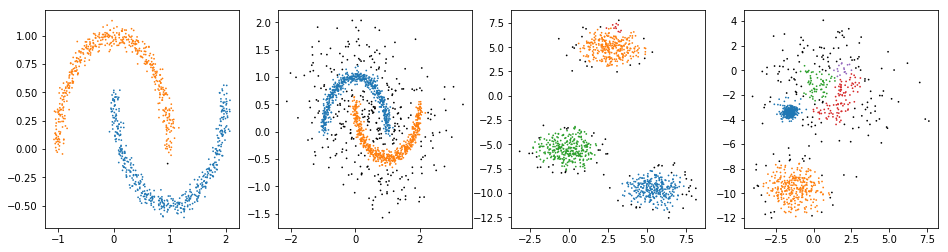

In [18]:
plt.figure(figsize = (16, 4))
eps_configs = [0.1, 0.1, 0.5, 0.5]
for i in range(len(demo_sets)):
    plt.subplot(1, len(demo_sets), i + 1)
    
    method = cluster.DBSCAN(eps = eps_configs[i], min_samples=10)
    predicted_clusters = method.fit_predict(demo_sets[i][0])
    C = len(set(predicted_clusters))
    colors = [cm.Vega10(c) if c >= 0 else (0.0, 0.0, 0.0, 1.0) for c in predicted_clusters]
    plt.scatter(demo_sets[i][0][:, 0], demo_sets[i][0][:, 1], color = colors, edgecolors='none', s = 3)